# Previsão de Qualidade do Ar

## Proposta

Listar cada uma das features com o seu significado

---
## Análise Exploratória

Analisar cada uma das features e analisar sua distribuição

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from datetime import date, timedelta

In [2]:
# Configurar a conexão ao PostgreSQL
USER = "postgres"
PASSWORD = "password"
HOST = "localhost"  # Exemplo: "localhost" ou IP do servidor
PORT = "5432"  # Porta padrão do PostgreSQL
DB_NAME = "db_measurements"

# Criar a string de conexão
conn_str = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB_NAME}"

# Criar a engine de conexão
engine = create_engine(conn_str)

# Testar a conexão e carregar dados em um DataFrame
query = "SELECT * FROM tbl_weather_history"
df_weather_history = pd.read_sql(query, engine)

# Testar a conexão e carregar dados em um DataFrame
query = "SELECT * FROM tbl_measurements"
df_measurements = pd.read_sql(query, engine)

# Exibir as primeiras linhas
print(df_weather_history.head())

   id     ds_city     dt_date  qt_avg_humidity  qt_avg_temp_c  qt_avg_vis_km  \
0   1  Valparaiso  2024-03-30             66.0           18.6           10.0   
1   2  Valparaiso  2024-03-31             49.0           18.8           10.0   
2   3  Valparaiso  2024-04-01             59.0           16.7           10.0   
3   4  Valparaiso  2024-04-02             62.0           16.5           10.0   
4   5  Valparaiso  2024-04-03             72.0           16.8           10.0   

   qt_max_wind_kph  qt_total_precip_mm  qt_pressure_mb  
0             23.1                 0.0         1014.13  
1             32.4                 0.0         1015.00  
2             24.6                 0.0         1015.25  
3             18.0                 0.0         1014.79  
4             24.8                 1.6         1015.96  


In [3]:
# estatisticas das features de histórico
df_measurements.head()

,id,id_sensor,ds_city,dt_date_from,dt_date_to,qt_pm25
0,1,67,Valparaíso,2024-03-26 03:00:00,2024-03-27 03:00:00,15.3
1,2,67,Valparaíso,2024-03-27 03:00:00,2024-03-28 03:00:00,12.0
2,3,67,Valparaíso,2024-03-28 03:00:00,2024-03-29 03:00:00,11.7
3,4,67,Valparaíso,2024-05-12 04:00:00,2024-05-13 04:00:00,11.0
4,5,67,Valparaíso,2024-05-13 04:00:00,2024-05-14 04:00:00,17.3


In [4]:
df_weather_history['dt_date'] = df_weather_history['dt_date'].apply(lambda x: x.isoformat() if pd.notnull(x) else None)
df_weather_history.head()

,id,ds_city,dt_date,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb
0,1,Valparaiso,2024-03-30,66.0,18.6,10.0,23.1,0.0,1014.13
1,2,Valparaiso,2024-03-31,49.0,18.8,10.0,32.4,0.0,1015.00
2,3,Valparaiso,2024-04-01,59.0,16.7,10.0,24.6,0.0,1015.25
3,4,Valparaiso,2024-04-02,62.0,16.5,10.0,18.0,0.0,1014.79
4,5,Valparaiso,2024-04-03,72.0,16.8,10.0,24.8,1.6,1015.96


In [5]:
df_measurements['dt_date'] = df_measurements['dt_date_from'].apply(lambda x: x.date().isoformat() if pd.notnull(x) else None)
df_measurements.head()

,id,id_sensor,ds_city,dt_date_from,dt_date_to,qt_pm25,dt_date
0,1,67,Valparaíso,2024-03-26 03:00:00,2024-03-27 03:00:00,15.3,2024-03-26
1,2,67,Valparaíso,2024-03-27 03:00:00,2024-03-28 03:00:00,12.0,2024-03-27
2,3,67,Valparaíso,2024-03-28 03:00:00,2024-03-29 03:00:00,11.7,2024-03-28
3,4,67,Valparaíso,2024-05-12 04:00:00,2024-05-13 04:00:00,11.0,2024-05-12
4,5,67,Valparaíso,2024-05-13 04:00:00,2024-05-14 04:00:00,17.3,2024-05-13


In [6]:
# merge dos dois dataframes
df = pd.merge(df_weather_history, df_measurements, on=['ds_city', 'dt_date'], how='inner')
df.head()

,id_x,ds_city,dt_date,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,id_y,id_sensor,dt_date_from,dt_date_to,qt_pm25
0,363,Puerto Varas,2024-03-30,75.0,10.0,8.0,16.8,1.3,1024.54,149,28507,2024-03-30 03:00:00,2024-03-31 03:00:00,47.5
1,364,Puerto Varas,2024-03-31,74.0,8.8,10.0,14.4,0.0,1022.96,150,28507,2024-03-31 03:00:00,2024-04-01 03:00:00,30.3
2,365,Puerto Varas,2024-04-01,72.0,9.1,10.0,11.8,0.0,1019.58,151,28507,2024-04-01 03:00:00,2024-04-02 03:00:00,46.2
3,366,Puerto Varas,2024-04-02,87.0,10.6,8.4,45.6,30.6,1003.54,152,28507,2024-04-02 03:00:00,2024-04-03 03:00:00,47.3
4,367,Puerto Varas,2024-04-03,90.0,9.5,8.7,17.5,0.9,1017.50,153,28507,2024-04-03 03:00:00,2024-04-04 03:00:00,30.9


In [7]:
# remocao de colunas
df.drop(columns=['id_x', 'id_y', 'id_sensor', 'dt_date_from', 'dt_date_to'], inplace=True)

In [8]:
# média da leitura dos sensores para cada cidade
df = df.groupby(['ds_city', 'dt_date']).mean().reset_index()
df.head()

,ds_city,dt_date,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25
0,Puerto Montt,2024-03-30,75.0,10.1,8.7,11.5,1.50,1024.50,24.55
1,Puerto Montt,2024-03-31,73.0,9.2,10.0,13.3,0.00,1023.04,26.15
2,Puerto Montt,2024-04-01,72.0,9.1,10.0,8.3,0.00,1019.50,43.75
3,Puerto Montt,2024-04-02,87.0,10.2,8.3,43.6,30.88,1002.88,30.10
4,Puerto Montt,2024-04-03,90.0,9.3,8.1,17.7,0.90,1017.13,26.95


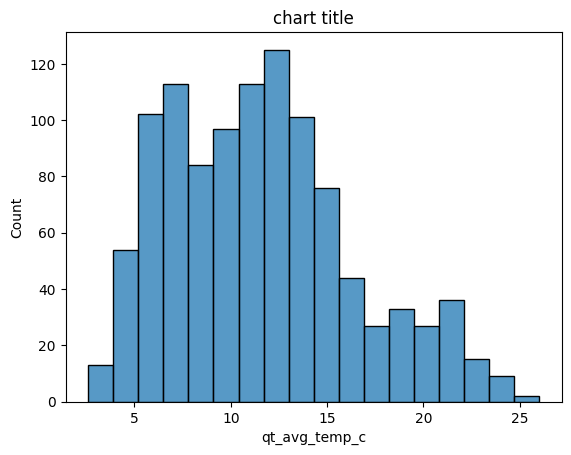

In [9]:
# distribuicao da temperatura média
sns.histplot(df['qt_avg_temp_c'])
plt.title('chart title')
plt.show()

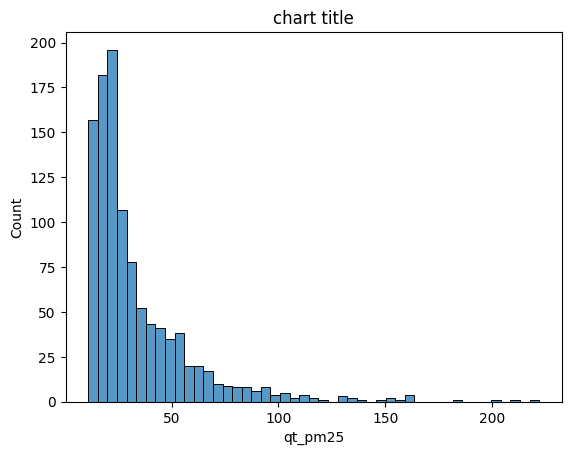

In [10]:
# distribuicao da pm2.5
sns.histplot(df['qt_pm25'])
plt.title('chart title')
plt.show()

---
## Pré Processamento

### Valores Duplicados

In [11]:
# verificação de existência de valores duplicados
print(df.duplicated().sum())
# remoçao de valores duplicados
#df.drop_duplicates()

0


### Valores Faltantes

In [12]:
# verificação de valores faltantes
print(df.isnull().sum())
# remoção de linhas com valores nulos
#df_clean = df.dropna()
# para preencher valores faltantes com a média da coluna
#df_filled = df.fillna(df.mean())

ds_city               0
dt_date               0
qt_avg_humidity       0
qt_avg_temp_c         0
qt_avg_vis_km         0
qt_max_wind_kph       0
qt_total_precip_mm    0
qt_pressure_mb        0
qt_pm25               0
dtype: int64


### Codificação de Variáveis Categóricas

In [13]:
# tratamento de data
df['dt_date'] = pd.to_datetime(df['dt_date'])
df["ano"] = df["dt_date"].dt.year
df["mes"] = df["dt_date"].dt.month
df["dia"] = df["dt_date"].dt.day
df.drop(columns=['dt_date'], inplace=True)
df.head()

,ds_city,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25,ano,mes,dia
0,Puerto Montt,75.0,10.1,8.7,11.5,1.50,1024.50,24.55,2024,3,30
1,Puerto Montt,73.0,9.2,10.0,13.3,0.00,1023.04,26.15,2024,3,31
2,Puerto Montt,72.0,9.1,10.0,8.3,0.00,1019.50,43.75,2024,4,1
3,Puerto Montt,87.0,10.2,8.3,43.6,30.88,1002.88,30.10,2024,4,2
4,Puerto Montt,90.0,9.3,8.1,17.7,0.90,1017.13,26.95,2024,4,3


In [25]:
from sklearn.preprocessing import OneHotEncoder

# Instanciando a classe do OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(df[['ds_city']]).toarray()
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ds_city']))

# Concatenar os novos dados codificados ao dados
df_encoded = pd.concat([df, df_encoded], axis=1)
df_encoded = df_encoded.drop(['ds_city'], axis=1)
df_encoded.head()

,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25,ano,mes,dia,ds_city_Puerto Montt,ds_city_Puerto Varas,ds_city_Santiago
0,75.0,10.1,8.7,11.5,1.50,1024.50,24.55,2024,3,30,1.0,0.0,0.0
1,73.0,9.2,10.0,13.3,0.00,1023.04,26.15,2024,3,31,1.0,0.0,0.0
2,72.0,9.1,10.0,8.3,0.00,1019.50,43.75,2024,4,1,1.0,0.0,0.0
3,87.0,10.2,8.3,43.6,30.88,1002.88,30.10,2024,4,2,1.0,0.0,0.0
4,90.0,9.3,8.1,17.7,0.90,1017.13,26.95,2024,4,3,1.0,0.0,0.0


In [ ]:
# Selecionar apenas as features relevantes
X = df_encoded['qt_avg_humidity', 'qt_avg_temp_c', 'qt_avg_vis_km', 'qt_max_wind_kph', 'qt_total_precip_mm', 'qt_pressure_mb']
y = df_encoded['qt_pm25']  # Substitua 'pm2.5' pelo nome da coluna alvo, se necessário

In [34]:
df_encoded.head()

,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25,ano,mes,dia,ds_city_Puerto Montt,ds_city_Puerto Varas,ds_city_Santiago
0,75.0,10.1,8.7,11.5,1.50,1024.50,24.55,2024,3,30,1.0,0.0,0.0
1,73.0,9.2,10.0,13.3,0.00,1023.04,26.15,2024,3,31,1.0,0.0,0.0
2,72.0,9.1,10.0,8.3,0.00,1019.50,43.75,2024,4,1,1.0,0.0,0.0
3,87.0,10.2,8.3,43.6,30.88,1002.88,30.10,2024,4,2,1.0,0.0,0.0
4,90.0,9.3,8.1,17.7,0.90,1017.13,26.95,2024,4,3,1.0,0.0,0.0


---
## Divisão dos Dados em Treino e Teste

In [35]:
# divisão dos dados
X = df_encoded.drop(['qt_pm25'], axis=1)
y = df_encoded['qt_pm25'].values

In [36]:
df_encoded.head()

,qt_avg_humidity,qt_avg_temp_c,qt_avg_vis_km,qt_max_wind_kph,qt_total_precip_mm,qt_pressure_mb,qt_pm25,ano,mes,dia,ds_city_Puerto Montt,ds_city_Puerto Varas,ds_city_Santiago
0,75.0,10.1,8.7,11.5,1.50,1024.50,24.55,2024,3,30,1.0,0.0,0.0
1,73.0,9.2,10.0,13.3,0.00,1023.04,26.15,2024,3,31,1.0,0.0,0.0
2,72.0,9.1,10.0,8.3,0.00,1019.50,43.75,2024,4,1,1.0,0.0,0.0
3,87.0,10.2,8.3,43.6,30.88,1002.88,30.10,2024,4,2,1.0,0.0,0.0
4,90.0,9.3,8.1,17.7,0.90,1017.13,26.95,2024,4,3,1.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Normalização

In [106]:
#from sklearn.preprocessing import Normalizer

# Inicializar o Normalizer
#normalizer = Normalizer.fit(X)
# Normalização entre 0 e 1
#X_train_normalized = normalizer.transform(X_train)
#X_test_normalized = normalizer.transform(X_test)

### Padronização

In [17]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler apenas na base de treino
scaler.fit(X_train)

# Aplicar a transformação nas bases de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## Definição de Métricas de Avaliação

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [19]:
# função para testar modelos de regressão e retornar valores das métricas
def reg_evaluation(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')
    return

---
## Treinamento dos Modelos

### Regressão Linear

In [110]:
from sklearn.linear_model import LinearRegression

# criando e treinando o modelo
reg_model = LinearRegression()
reg_evaluation(reg_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 360.6656222358224
RMSE: 18.99119854658527
MAPE: 0.4406786303773518


In [111]:
y_test.shape

(215,)

### KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# criando e treinando o modelo
knn_reg_model = KNeighborsRegressor()
reg_evaluation(knn_reg_model, X_train_scaled, y_train, X_test_scaled, y_test)


MSE: 330.2343958139535
RMSE: 18.17235251182283
MAPE: 0.25995884047546564


##### Salvar o arquivo

In [151]:
import pickle

# salvar o modelo em um arquivo pickle
arquivo_pickle = 'model.sav'
pickle.dump(knn_reg_model, open(arquivo_pickle, 'wb'))

##### Carregar o arquivo

In [152]:
# carregar o modelo do arquivo pickle
pickle.load(open(arquivo_pickle, 'rb'))

KNeighborsRegressor()

### SVR

In [113]:
from sklearn.svm import SVR

# criando e treinando o modelo
svr_model = SVR()
reg_evaluation(svr_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 416.62569396125605
RMSE: 20.41141087630289
MAPE: 0.2232325331282053


### Árvore de Regressão

In [114]:
from sklearn.tree import DecisionTreeRegressor

# criando e treinando o modelo
tree_reg_model = DecisionTreeRegressor()
reg_evaluation(tree_reg_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 528.4397558139535
RMSE: 22.987817552215642
MAPE: 0.3167430460260567


### XGBoost

In [115]:
from xgboost import XGBRegressor

# criando e treinando o modelo
xgb_model = XGBRegressor()
reg_evaluation(xgb_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 255.19642429639177
RMSE: 15.974868522037726
MAPE: 0.22059294100095606


### Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
reg_evaluation(rf_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 250.65416879418612
RMSE: 15.832061419606296
MAPE: 0.22809441939718264


#### Ajustando os Hiperparâmetros do Random Forest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definindo os parâmetros a serem testados
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Criando o modelo Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearchCV para encontrar os melhores parâmetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Exibindo os melhores parâmetros
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

# Avaliando o desempenho no conjunto de teste
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculando as métricas
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END max_depth=10, max_features=auto

/home/diogo/Documentos/Teste/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
161 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diogo/Documentos/Teste/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diogo/Documentos/Teste/venv/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/diogo/Documentos/Teste/venv/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
   

Melhores parâmetros encontrados:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
MSE: 238.37502860724481
RMSE: 15.43939858308104
MAPE: 0.21784629671188505


Salvando o modelo do RF no arquivo

In [23]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Supondo que o modelo foi treinado
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Salvar o modelo treinado
joblib.dump(rf_model, 'best_rf_model.pk')
print("Modelo salvo com sucesso!")

Modelo salvo com sucesso!


In [24]:
print(X_train.columns)

Index(['qt_avg_humidity', 'qt_avg_temp_c', 'qt_avg_vis_km', 'qt_max_wind_kph',
       'qt_total_precip_mm', 'qt_pressure_mb', 'ano', 'mes', 'dia',
       'ds_city_Puerto Montt', 'ds_city_Puerto Varas', 'ds_city_Santiago'],
      dtype='object')


### Modelo ARIMA

In [118]:
from statsmodels.tsa.arima.model import ARIMA

# Define the p, d, q parameters
p = 1  # AR (autoregressive) order
d = 1  # Differencing order
q = 1  # MA (moving average) order

# Fit the ARIMA model using y_train as the time series data
model = ARIMA(y_train, order=(p, d, q))  # Define ARIMA with p, d, q parameters
model_fit = model.fit()  # Fit the model


# You can now view the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  856
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4015.708
Date:                Sun, 30 Mar 2025   AIC                           8037.416
Time:                        18:19:29   BIC                           8051.669
Sample:                             0   HQIC                          8042.874
                                - 856                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0323      0.039      0.835      0.404      -0.043       0.108
ma.L1         -0.9998      0.091    -11.012      0.000      -1.178      -0.822
sigma2       697.7108     69.237     10.077      0.0

In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Definindo os parâmetros sazonais
P = 1  # AR sazonal
D = 1  # Diferenciação sazonal
Q = 1  # MA sazonal
s = 12  # Periodicidade sazonal, por exemplo, 12 para dados mensais com sazonalidade anual

# Definindo os parâmetros do ARIMA
p = 1  # AR (autoregressivo)
d = 1  # Diferenciação
q = 1  # MA (média móvel)

# Ajustando o modelo SARIMAX
model = SARIMAX(y_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
model_fit = model.fit()

# Exibindo o resumo do modelo
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  856
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -3990.034
Date:                            Sun, 30 Mar 2025   AIC                           7990.068
Time:                                    18:19:30   BIC                           8013.753
Sample:                                         0   HQIC                          7999.144
                                            - 856                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0318      0.038      0.831      0.406      -0.043       0.107
ma.L1         -0.9978      0.020   

### Modelos Híbridos (para Previsões Combinadas)

In [120]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

base_learners = [
    ('rf', RandomForestRegressor()),
    ('lr', LinearRegression())
]

stacking_model = StackingRegressor(estimators=base_learners, final_estimator=LinearRegression())
stacking_model.fit(X_train, y_train)
reg_evaluation(stacking_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 257.726536772974
RMSE: 16.05386360889409
MAPE: 0.22399591764368512


### MLP (Multilayer Perceptron)

In [121]:
#Normalização
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [122]:
from sklearn.neural_network import MLPRegressor
neural_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500)
neural_model.fit(X_train, y_train)
reg_evaluation(neural_model, X_train_scaled, y_train, X_test_scaled, y_test)

MSE: 273.99731866310157
RMSE: 16.5528643643057
MAPE: 0.2691448410949073


/home/diogo/Documentos/Teste/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


---
## Otimização do Modelo

### Grid Search com Validação Cruzada

In [123]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Definindo os parâmetros a serem ajustados
parameters = {'booster':('gbtree', 'dart'), 'eta': (0.01, 0.1, 0.3), 'max_depth': (3, 6, 10)}

# Criando o modelo
xgb_model = XGBRegressor()

# Ajuste fino com validação cruzada
clf = GridSearchCV(xgb_model, parameters, cv=10)

# Treinando o modelo com otimização
clf.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'booster': ('gbtree', 'dart'), 'eta': (0.01, 0.1, 0.3),
                         'max_depth': (3, 6, 10)})

In [124]:
y_pred = clf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}')

MSE: 255.90025561341378
RMSE: 15.996882684242383
MAPE: 0.2570207310886935


____

### Para salvar o modelo depois de definido qual será utilizado.

##### Exemplo de código de teste, o modelo deve salvo em "model¨: